# 딥러닝 라이브러리 실습: Torch의 이해 및 실습


### 실습 목표

* Torch와 nn 패키지의 이해
* 작은 Neural network 를 CPU에서 학습 및 실험

## 시작에 앞서

* Torch는 `Lua` 를 사용하여 코딩함
* `Lua`는 `Javascript`와 유사한 면을 지니며, 변수는 global이 default로, `local`이라는 키워드로 로컬변수 설정이 가능
* 1-based indexing.
* Function call `foo.bar()`는 Lua에서 `foo:bar()`로 쓰임
* Python에서의 `import`, C에서 `include` 처럼 외부 라이브러리를 포함시키는 명령어는 `require`임


## Lua: 기본 사용법
#### Strings, numbers, and tables

In [ ]:
a = 'hello'

In [ ]:
print(a)

In [ ]:
b = {}

In [ ]:
b[1] = a

In [ ]:
print(b)

In [ ]:
b[2] = 30

In [ ]:
for i=1,#b do -- the # operator is the length operator in Lua
    print(b[i]) 
end

#### Tensors

In [8]:
a = torch.Tensor(5,3) -- construct a 5x3 matrix, uninitialized

In [9]:
a = torch.rand(5,3)
print(a)

 0.6571  0.1667  0.8858
 0.0547  0.6048  0.4849
 0.3794  0.5189  0.1749
 0.8338  0.9002  0.2758
 0.0220  0.6223  0.7457
[torch.DoubleTensor of size 5x3]



In [10]:
b=torch.rand(3,4)

In [11]:
-- matrix-matrix multiplication: syntax 1
a*b 

 1.1616  1.3225  0.6878  0.6795
 0.7125  0.8149  0.8241  0.5996
 0.5274  0.7661  0.6579  0.6855
 0.9630  1.4436  1.1609  1.2946
 0.9472  1.0081  0.9542  0.6328
[torch.DoubleTensor of size 5x4]



In [12]:
-- matrix-matrix multiplication: syntax 2
torch.mm(a,b) 

 1.1616  1.3225  0.6878  0.6795
 0.7125  0.8149  0.8241  0.5996
 0.5274  0.7661  0.6579  0.6855
 0.9630  1.4436  1.1609  1.2946
 0.9472  1.0081  0.9542  0.6328
[torch.DoubleTensor of size 5x4]



In [13]:
-- matrix-matrix multiplication: syntax 3
c=torch.Tensor(5,4)
c:mm(a,b) -- store the result of a*b in c

#### (Optional) CUDA Tensors
:cuda function 을 통해서 변수를 GPU로 보낼 수 있음

본 실습에서 주어진 환경은 CPU 기반으로 작동되지 않음


In [14]:
require 'cutorch';
a = a:cuda()
b = b:cuda()
c = c:cuda()
c:mm(a,b) -- done on GPU

[string "require 'cutorch';..."]:1: module 'cutorch' not found:
	no field package.preload['cutorch']
	no file '/root/.luarocks/share/lua/5.1/cutorch.lua'
	no file '/root/.luarocks/share/lua/5.1/cutorch/init.lua'
	no file '/root/torch/install/share/lua/5.1/cutorch.lua'
	no file '/root/torch/install/share/lua/5.1/cutorch/init.lua'
	no file './cutorch.lua'
	no file '/root/torch/install/share/luajit-2.1.0-beta1/cutorch.lua'
	no file '/usr/local/share/lua/5.1/cutorch.lua'
	no file '/usr/local/share/lua/5.1/cutorch/init.lua'
	no file '/root/torch/install/lib/cutorch.so'
	no file '/root/.luarocks/lib/lua/5.1/cutorch.so'
	no file '/root/torch/install/lib/lua/5.1/cutorch.so'
	no file './cutorch.so'
	no file '/usr/local/lib/lua/5.1/cutorch.so'
	no file '/usr/local/lib/lua/5.1/loadall.so'
stack traceback:
	[C]: in function 'require'
	[string "require 'cutorch';..."]:1: in main chunk
	[C]: in function 'xpcall'
	/root/torch/install/share/lua/5.1/itorch/main.lua:209: in function </root/torch/install/share/lua/5.1/itorch/main.lua:173>
	/root/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/root/torch/install/share/lua/5.1/itorch/main.lua:381: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00406670: 

#### Exercise: Add two tensors
https://github.com/torch/torch7/blob/master/doc/maths.md#res-torchaddres-tensor1-tensor2

In [6]:
function addTensors(a,b)
    return a --FIX ME
end

In [7]:
a = torch.ones(5,2)
b = torch.Tensor(2,5):fill(4)
print(addTensors(a,b))

 1  1
 1  1
 1  1
 1  1
 1  1
[torch.DoubleTensor of size 5x2]



예상 결과:

5 5

5 5

5 5

5 5

5 5

### Neural Networks
Torch 에서 Neural Net은 `nn` 이라는 패키지를 통해서 구축함

In [16]:
require 'nn';

* `module`은 Neural Net을 구성하는 기본 요소로, Layer, activation 등을 정의함
* 각 `module`은 `containers`를 이용하여 보다 복잡한 구조로 설계가 가능함

예시로, 다음과 같은 네트워크를 만들어보겠습니다.
![LeNet](http://fastml.com/images/cifar/lenet5.png)

* 위 네트워크는 Yann Lecun이 제시한 `LeNet` 이라고 불리는 네트워크로, 최근에는 `Convolutional Neural Network (CNN)` 이라는 이름으로 불림
* 간단한 feed-forward 구조를 가지며, 입력으로 이미지를 받아 일련의 레이어들의 연산을 거친 뒤 해당 이미지가 0~9중 어떤 숫자인 지 맞추는 역할을 수행함
* 이런 경우, `nn.Sequential`을 이용하여 여러 레이어를 묶을 수 있음

In [17]:
net = nn.Sequential()
net:add(nn.SpatialConvolution(1, 6, 5, 5)) -- 1 input image channel, 6 output channels, 5x5 convolution kernel
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*5, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(84, 10))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems

print('Lenet5\n' .. net:__tostring());

Lenet5
nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> output]
  (1): nn.SpatialConvolution(1 -> 6, 5x5)
  (2): nn.ReLU
  (3): nn.SpatialMaxPooling(2x2, 2,2)
  (4): nn.SpatialConvolution(6 -> 16, 5x5)
  (5): nn.ReLU
  (6): nn.SpatialMaxPooling(2x2, 2,2)
  (7): nn.View(400)
  (8): nn.Linear(400 -> 120)
  (9): nn.ReLU
  (10): nn.Linear(120 -> 84)
  (11): nn.ReLU
  (12): nn.Linear(84 -> 10)
  (13): nn.LogSoftMax
}	


`nn.Sequential`이외에 다른 Container 들은 다음과 같음
![containers](https://raw.githubusercontent.com/soumith/ex/gh-pages/assets/nn_containers.png)

* Torch의 강점 중 하나는 Automatic differentiation을 지원한다는 것임
* `:forward(input)` 으로 입력에 대한 출력이 만들어지면, `:backward(input, gradient)` 가 각 neuron 에 대한 gradient를 chain rule을 이용해 계산함 

In [18]:
input = torch.rand(1,32,32) -- pass a random tensor as input to the network

In [19]:
output = net:forward(input)

In [20]:
print(output)

-2.1829
-2.2303
-2.3989
-2.2164
-2.3583
-2.4214
-2.2408
-2.3583
-2.3725
-2.2789
[torch.DoubleTensor of size 10]



In [21]:
net:zeroGradParameters() -- zero the internal gradient buffers of the network (will come to this later)

In [22]:
gradInput = net:backward(input, torch.rand(10))

In [23]:
print(#gradInput)


  1
 32
 32
[torch.LongStorage of size 3]



### Criterion: loss function 정의하기

앞서 계산한 Gradient 값은 랜덤한 숫자에 대해서 Backward 연산을 합니다.

이제는, 정해진 목표에 기반해 네트워크를 학습하는 방법에 대해 알아보겠습니다. 이 때, 정해진 목표를 측정하는 방법을 __loss function__ 이라고 합니다.

__loss function__은 주어진 입력이 모델을 통과해서 나온 결과와 정답을 비교하여 측정하게 되며, 네트워크는 이를 줄여나가는 방향으로 학습하게 됩니다. 

Torch 에서는 loss function 을 이용해 neural network 를 학습할 때 automatic differentiation을 쓰고, 이는 `forward(input, target)`, `backward(input, target)`을 통해서 구현됩니다. 아래에서 loss function 을 이용한 예시를 살펴보겠습니다. 

In [24]:
criterion = nn.ClassNLLCriterion() -- a negative log-likelihood criterion for multi-class classification
criterion:forward(output, 3) -- let's say the groundtruth was class number: 3
gradients = criterion:backward(output, 3)

In [25]:
gradInput = net:backward(input, gradients)
print(gradInput)

(1,.,.) = 
 Columns 1 to 9
 0.001 *
   0.0000  0.0291  0.0371  0.0183  0.1086  0.1493 -0.0134  0.2299  0.2806
   0.0000  0.0089  0.0428 -0.0107 -0.0140  0.1725  0.1913 -0.5681  0.2317
   0.0694  0.1314  0.0042  0.2256  0.5145  0.0254 -0.0771 -0.4593  0.0086
  -0.0914 -0.1123 -0.0714 -0.0739  0.2267  0.1155 -0.4630 -0.3367  0.6342
  -0.1163 -0.2187  0.1422  0.0062  0.2223  0.2562  0.5974  0.5633  0.0321
  -0.1753 -0.0345  0.2873  0.0723  0.3194  0.4790  0.2372  0.0729  0.7507
  -0.0208 -0.1115  0.4422  0.1982  0.0380 -0.2949  0.2031  0.2621 -1.1014
   0.0479 -0.0935 -0.0459 -0.2865 -1.2765 -0.8246  0.0526 -0.3158  0.6791
  -0.2674 -0.6385 -0.3457 -1.1053 -0.9820  0.1198 -0.2533 -0.2498 -0.3046
   0.1591 -0.2521  0.1485  0.6525 -0.1052  0.5137  1.6417  0.7247  0.5735
   0.0441  0.3987  0.2063 -0.3440  1.2973  1.8492 -0.6270 -1.5242 -0.2255
   0.2003 -0.1226  0.6185 -0.2960  0.2886  0.0261 -0.9714 -1.9248 -0.4643
   0.1717  0.1578 -0.1734 -0.8594  0.6032  0.2577  0.0569  0.4985  0.1514
  

0707  0.4495  1.1701  0.3510 -0.9234
  -0.8260  0.0989 -0.7745 -0.8186  1.8737 -1.0863  0.5746 -0.9142 -0.2036
  -0.2927  0.6700  1.4890 -0.3628  0.9798 -2.0676  0.9222  0.1318 -0.8615
  -1.9893  0.2233 -0.9961  0.0589  2.1187 -1.3652  0.8751  0.0650 -0.1673
   1.6509  0.0718 -1.2880  0.1548  1.1879  0.1907  0.2835  0.4890  1.2773
   0.0051 -0.2732  0.1568  0.3367 -0.1594  0.6350  1.5084 -0.9498 -0.2570
   0.5263 -0.6826 -0.7995  1.2223  0.5330 -0.1184 -0.0877 -0.6064 -0.9064
   0.0297 -0.3268 -0.6540 -0.6925  0.1483 -0.0695 -0.8240 -0.1422  0.2905
  -0.3318  0.2102 -0.0185 -0.1207  0.0641  0.3514 -0.1259  0.4044  0.2492
  -0.5096 -0.3012  0.5028  0.0709 -0.2461  0.5003  0.1534 -0.2304 -0.1150

Columns 19 to 27
 0.001 *
   0.0984 -0.0785  0.0044 -0.0466 -0.0407 -0.0940 -0.0259  0.1236  0.0185
  -0.3696 -0.1641  0.0082  0.3497 -0.1876 -0.1073 -0.1664  0.0773 -0.1996
  -0.0962  0.2621 -0.2432  0.1952 -0.2940 -0.0807 -0.3321 -0.0414 -0.2135
   0.1693 -0.0649 -0.0228  0.1715 -0.2422 -0.155

8477 -0.0621 -0.5562  0.4839  0.0504
   0.3001  0.2313 -0.1023 -0.1863 -0.1403
  -0.0212 -0.0045  0.1505 -0.1419 -0.0741
  -0.1642  0.1866  0.1029 -0.0739 -0.0760
  -0.2734  0.4564 -0.0892 -0.0021  0.0455
   0.2106  0.1346 -0.0467 -0.0794 -0.0291
   0.0764  0.1396 -0.2192 -0.1821  0.0357
   0.0130 -0.0644  0.0196  0.0595 -0.0848
  -0.1196 -0.2022  0.0390 -0.0442 -0.0630
[torch.DoubleTensor of size 1x32x32]



##### 현재까지 배운 내용
* 하나의 네트워크는 다양한 컨테이너 및 모듈로 생성 가능하며, 사용하는 컨테이너/모듈에 따라 연산도 다양해집니다.
* 네트워크는 :forward 로 입력을 받아 출력을 내보냅니다.
* Criterion은 네트워크의 loss를 의미하며, 해당 loss를 줄이는 방향으로 gradient 를 계산합니다. 
* Criterion으로부터 계산한 gradient를 이용해 net:backward를 이용해 네트워크의 파라미터들을 수정합니다. 

##### Missing details
* 특정 레이어는 학습 가능한 파라미터를 가지고 있지 않습니다.
* 학습되는 파라미터는 주로 .weight (혹은 .bias) 라는 필드에 값이 저장되어 있으며, pooling layer의 경우에는 따로 파라미터를 학습하지 않습니다.

In [26]:
m = nn.SpatialConvolution(1,3,2,2) -- learn 3 2x2 kernels
print(m.weight) -- initially, the weights are randomly initialized

(1,1,.,.) = 
 -0.3884 -0.1866
 -0.0250  0.2955

(2,1,.,.) = 
 -0.4183  0.4169
 -0.0607  0.4456

(3,1,.,.) = 
  0.1390  0.1635
 -0.3762  0.2553
[torch.DoubleTensor of size 3x1x2x2]



In [27]:
print(m.bias) -- The operation in a convolution layer is: output = convolution(input,weight) + bias

-0.1599
-0.4654
-0.3679
[torch.DoubleTensor of size 3]



이처럼, 접근 가능한 필드 중에서 학습되는 또 다른 필드는 gradWeight와 gradBisa가 있슨비다.
gradWeight는 각 레이어 내의 weight에 대한 gradient가, gradBias는 레이어 내의 bias에 대한 gradient가 저장되는 곳입니다.

#### Training the network

이제부터 네트워크를 직접 학습해보겠습니다. 이는 아래의 식을 따라 파라미터를 변경하는 것을 의미합니다.
> weight = weight + learningRate * gradWeight [equation 1]

위 업데이트는 네트워크의 파라미터를 바꿔 loss를 줄여나가는 역할을 하게 됩니다. 본 실습에서 쓰이는 방법은 Stochastic Gradient Descent (SGD) 입니다. 


위 Equation 1을 수행하기 위해서는 SGD를 수행하는 nn 내의 모듈을 이용해야 합니다. 이는 [__nn.StochasticGradient__] 으로 정의되어 있습니다. (https://github.com/torch/nn/blob/master/doc/training.md#stochasticgradientmodule-criterion).

위 모듈은 :train(dataset)이라는 함수를 가지고 있어 주어진 dataset을 이용해 네트워크를 학습할 수 있습니다. 자세한 사용법은 아래에서 설명하겠습니다. 


### What about data?

이제 직접 네트워크를 학습하기에 앞서, 데이터를 어떻게 네트워크에 넣는 지에 대해서 설명하겠습니다. 이미지, 텍스트, 오디오, 비디오 등 다양한 형식의 입력이 가능하며, 이는 예를 들어 [__image.load__](https://github.com/torch/image#res-imageloadfilename-depth-tensortype), [__audio.load__](https://github.com/soumith/lua---audio#usage) 등이 이용될 수 있습니다. 보다 자세한 Data I/O에 관련해서는 https://github.com/torch/torch7/wiki/Cheatsheet#data-formats 페이지를 참고하시면 도움을 얻을 수 있습니다. 

본 실습을 위해서 이용되는 데이터셋은 CIFAR-10 이라는 데이터로, 다음과 같은 class를 가지고 있습니다. 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.  

각 이미지는 3x32x32의 사이즈를 지니며, 즉, RGB 의 3채널의 32x32 pixels 크기의 이미지를 의미합니다.
![CIFAR-10 image](https://raw.githubusercontent.com/soumith/ex/gh-pages/assets/cifar10.png)

해당 데이터셋은  50,000의 트레이닝 이미지와 10,000 장의 테스트 이미지를 포함하고 있습니다.

__딥러닝을 이용한 데이터 분석 5 단계__
1. 데이터 Load 및 normalization
2. 모델 정의 (e.g. DNN, CNN, ...)
3. Loss function 정의 (e.g. Euclidean distance, NLL, ...)
4. 트레이닝 데이터로 모델 학습하기
5. 테스트 데이터로 모델 테스트하기

__1. 데이터 Load 및 normalization__

앞서 말한 CIFAR-10을 직접 불러오겠습니다. 이는 사전에 다운로드 받아져있을 것이며, 아닌 경우 자동으로 다운 받아집니다. (다운을 새로 받는 경우, 몇 분의 시간이 소요됩니다.)

In [28]:
require 'paths'
if (not paths.filep("cifar10torchsmall.zip")) then
    os.execute('wget -c https://s3.amazonaws.com/torch7/data/cifar10torchsmall.zip')
    os.execute('unzip cifar10torchsmall.zip')
end
trainset = torch.load('cifar10-train.t7')
testset = torch.load('cifar10-test.t7')
classes = {'airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}

In [29]:
print(trainset)

{
  data : ByteTensor - size: 10000x3x32x32
  label : ByteTensor - size: 10000
}


In [30]:
print(#trainset.data)

 10000
     3
    32
    32
[torch.LongStorage of size 4]



CIFAR-10 내의 이미지를 프린트해보겠습니다.

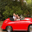

automobile	


In [31]:
itorch.image(trainset.data[100]) -- display the 100-th image in dataset. You can freely change this.
print(classes[trainset.label[100]])

앞서 언급한 __nn.StochasticGradient__ 에 이용되기 위해서는, dataset에 다음과 같은 가공을 해야 합니다. [documentation](https://github.com/torch/nn/blob/master/doc/training.md#traindataset).
1. 데이터셋이 :size() 함수를 지니고 있어야 합니다. 
2. 데이터셋은 [i] 로 indexing이 가능해야 합니다. 

위 두 사항은 다음과 같이 진행함으로 데이터셋을 변형할 수 있습니다.

In [32]:
-- ignore setmetatable for now, it is a feature beyond the scope of this tutorial. It sets the index operator.
setmetatable(trainset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);
trainset.data = trainset.data:double() -- convert the data from a ByteTensor to a DoubleTensor.

function trainset:size() 
    return self.data:size(1) 
end

In [33]:
print(trainset:size()) -- just to test

10000	


{
  1 : DoubleTensor - size: 3x32x32
  2 : 2
}


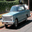

In [34]:
print(trainset[33]) -- load sample number 33.
itorch.image(trainset[33][1])

__이제 주어진 데이터를 normalization을 해야 합니다. 일반적으로 많이 쓰이는 방법은 zero mean unit variance 로, 말 그대로 주어진 데이터의 mean을 0으로 맞추고  stdev을 1로 조정하는 것입니다. __

위 normalization을 하기에 앞서, tensor variable을 indexing 하는 방법에 대해서 간략히 소개하겠습니다. 

In [35]:
redChannel = trainset.data[{ {}, {1}, {}, {}  }] -- this picks {all images, 1st channel, all vertical pixels, all horizontal pixels}

In [36]:
print(#redChannel)

 10000
     1
    32
    32
[torch.LongStorage of size 4]



위 예제에서, trainset.data 를 [{}] 로 indexing 하기 시작했으며, {}는 모든 elements, {i}는 i i 인덱스를 추출하는 것을 의미합니다. range를 indexing 하기 위해서는 {i1, i2} (where i2>i1) 처럼 작성하면 되며 이 경우 i1 부터 i2 까지의 elements를 반환합니다. 

__연습문제: 데이터의 150번째부터 300번째까지 데이터를 추출하시오.__

In [37]:
-- TODO: fill

이제, 위에서 말한 zero mean unit variance normalization을 수행하겠습니다:

In [38]:
mean = {} -- store the mean, to normalize the test set in the future
stdv  = {} -- store the standard-deviation for the future
for i=1,3 do -- over each image channel
    mean[i] = trainset.data[{ {}, {i}, {}, {}  }]:mean() -- mean estimation
    print('Channel ' .. i .. ', Mean: ' .. mean[i])
    trainset.data[{ {}, {i}, {}, {}  }]:add(-mean[i]) -- mean subtraction
    
    stdv[i] = trainset.data[{ {}, {i}, {}, {}  }]:std() -- std estimation
    print('Channel ' .. i .. ', Standard Deviation: ' .. stdv[i])
    trainset.data[{ {}, {i}, {}, {}  }]:div(stdv[i]) -- std scaling
end

Channel 1, Mean: 125.83175029297	


Channel 1, Standard Deviation: 63.143400842609	


Channel 2, Mean: 123.26066621094	


Channel 2, Standard Deviation: 62.369209019002	


Channel 3, Mean: 114.03068681641	


Channel 3, Standard Deviation: 66.965808411114	


__ 2. 모델 정의하기__


**예제:** 위의 __Neural Networks__ 섹션에서 코드를 가져와 3 채널 이미지를 입력으로 하는 네트워크를 설계해보세요. 
Hint: 첫번째 레이어만 수정하면 됩니다.

__Solution:__

In [39]:
net = nn.Sequential()
net:add(nn.SpatialConvolution(3, 6, 5, 5)) -- 3 input image channels, 6 output channels, 5x5 convolution kernel
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*5, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(84, 10))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems

__3. Loss function 정의하기__

본 예제에서는 Log-likelihood classification loss를 사용하겠습니다. Log-likelihood loss는 대부분의 classificatin에 통용됩니다.

In [40]:
criterion = nn.ClassNLLCriterion()

__4. 네트워크 학습하기__

먼저, __nn.StochasticGradient__ 객체를 정의하겠습니다. 그 후에 생성한 객체의 __:train__ function에 앞서 정의한 dataset을 입력으로 넣어 학습을 진행하겠습니다.

In [41]:
trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 5 -- just do 5 epochs of training.

In [ ]:
trainer:train(trainset)

__5. 학습된 네트워크 테스트하기__

축하합니다! 네트워크를 성공적으로 학습하셨습니다.

이제 학습한 네트워크가 테스트 데이터 (학습 때 쓰이지 않은, 모델이 처음 보는 데이터)에 대해서도 좋은 성능을 낼 수 있는 지 평가해보도록 하겠습니다.

In [ ]:
print(classes[testset.label[100]])
itorch.image(testset.data[100])

트레이닝 데이터에서 해주었던 것처럼, testset의 데이터를 normalization 해줍니다.

In [ ]:
testset.data = testset.data:double()   -- convert from Byte tensor to Double tensor
for i=1,3 do -- over each image channel
    testset.data[{ {}, {i}, {}, {}  }]:add(-mean[i]) -- mean subtraction    
    testset.data[{ {}, {i}, {}, {}  }]:div(stdv[i]) -- std scaling
end

In [ ]:
-- for fun, print the mean and standard-deviation of example-100
horse = testset.data[100]
print(horse:mean(), horse:std())

다음으로, 학습한 네트워크에 테스트 데이터를 입력으로 하여 예측 결과를 출력해봅니다.

In [ ]:
print(classes[testset.label[100]])
itorch.image(testset.data[100])
predicted = net:forward(testset.data[100])

In [ ]:
-- the output of the network is Log-Probabilities. To convert them to probabilities, you have to take e^x 
print(predicted:exp())

출력된 결과로부터 네트워크가 각 클래스에 대해 예측한 확률 값을 확인할 수 있습니다.

In [ ]:
for i=1,predicted:size(1) do
    print(classes[i], predicted[i])
end

이제, 하나의 데이터가 아니라 테스트셋의 모든 이미지를 입력으로 하여 전체 정답율을 보겠습니다.

In [ ]:
correct = 0
for i=1,10000 do
    local groundtruth = testset.label[i]
    local prediction = net:forward(testset.data[i])
    local confidences, indices = torch.sort(prediction, true)  -- true means sort in descending order
    if groundtruth == indices[1] then
        correct = correct + 1
    end
end

In [ ]:
print(correct, 100*correct/10000 .. ' % ')

10개의 클래스가 있다는 상황에서, random guess를 하면 10%의 성능이 나온다는 것을 감안하면 위의 성능은 네트워크가 `데이터와 레이블 사이의 관계`를 학습이 되었다는 것을 알 수 있습니다.

In [ ]:
class_performance = {0, 0, 0, 0, 0, 0, 0, 0, 0, 0}
for i=1,10000 do
    local groundtruth = testset.label[i]
    local prediction = net:forward(testset.data[i])
    local confidences, indices = torch.sort(prediction, true)  -- true means sort in descending order
    if groundtruth == indices[1] then
        class_performance[groundtruth] = class_performance[groundtruth] + 1
    end
end

In [ ]:
for i=1,#classes do
    print(classes[i], 100*class_performance[i]/1000 .. ' %')
end

__이제 딥러닝을 이용해 데이터 분석 5단계를 종료했습니다.__

1. 데이터 Load 및 normalization
2. 모델 정의 (e.g. DNN, CNN, ...)
3. Loss function 정의 (e.g. Euclidean distance, NLL, ...)
4. 트레이닝 데이터로 모델 학습하기
5. 테스트 데이터로 모델 테스트하기

아래부터는 gpu enable 상태로 빌드된 Torch에서 이용이 가능합니다.

#### cunn: neural networks on GPUs using CUDA

In [ ]:
require 'cunn';

우선 cpu에서 정의된 net을 :cuda() 를 이용해 gpu에 올립니다.

In [ ]:
net = net:cuda()

마찬가지로, criterion 또한 gpu에 올립니다.

In [ ]:
criterion = criterion:cuda()

데이터 또한 gpu에 올립니다.

In [ ]:
trainset.data = trainset.data:cuda()
trainset.label = trainset.label:cuda()

이제, 앞서 cpu에서 한 것과 같이 학습합니다.

In [ ]:
trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 5 -- just do 5 epochs of training.

In [ ]:
trainer:train(trainset)

네트워크가 작을수록 cpu와 gpu의 성능 차이가 크지 않습니다. 성능 차이를 확인하기 위해선 보다 큰 네트워크를 이용해 실험을 진행하면 이를 확인할 수 있습니다.


### 실습 목표 (recap)

* Torch와 nn 패키지의 이해
* 작은 Neural network 를 CPU에서 학습 및 실험

### 다음 목표

* Build crazy graphs of networks: https://github.com/torch/nngraph
* Train on imagenet with multiple GPUs: https://github.com/soumith/imagenet-multiGPU.torch
* Train recurrent networks with LSTM on text: https://github.com/wojzaremba/lstm

* More demos and tutorials: https://github.com/torch/torch7/wiki/Cheatsheet

* Chat with developers of Torch: http://gitter.im/torch/torch7
* Ask for help: http://groups.google.com/forum/#!forum/torch7
